<a href="https://colab.research.google.com/github/Mahe-git2hub/openlab-endsem/blob/master/open_lab_endsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%%bash
rm -rf /content/openlab
rm -rf /content/openlab-endsem /
rm -rf /content/drive/'My Drive'/'end_sem_openlab'/
mkdir /content/drive/'My Drive'/'end_sem_openlab'/
git clone https://github.com/Mahe-git2hub/openlab-endsem.git
cp -r openlab-endsem/ /content/drive/'My Drive'/'end_sem_openlab'
rm -rf /content/openlab-endsem /

rm: it is dangerous to operate recursively on '/'
rm: use --no-preserve-root to override this failsafe
Cloning into 'openlab-endsem'...
rm: it is dangerous to operate recursively on '/'
rm: use --no-preserve-root to override this failsafe


In [3]:
%%bash
mkdir openlab
cp /content/drive/'My Drive'/end_sem_openlab/openlab-endsem -r /content/openlab/
ls

drive
openlab
sample_data


In [4]:
!pip install flask-ngrok


In [0]:
!python /content/openlab/openlab-endsem/open_lab_endsem.py

After this need not run this file. For testing only.

In [0]:
from flask_ngrok import run_with_ngrok

In [0]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

In [7]:
from pathlib import Path
import os
from bs4 import BeautifulSoup
import requests
import re
from flask import Flask, render_template, request, flash, redirect, url_for
from wordcloud import WordCloud
from werkzeug.wrappers import Request, Response
import matplotlib.pyplot as plt
import socket
import nltk
import threading
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Extracting Named Entity from an article

In [0]:
link1 = 'https://www.thehindu.com/news/national/centre-may-raise-loan-to-pay-shortfall-of-gst-compensation-amount/article31329841.ece?homepage=true'
link2 = 'https://www.thehindu.com/news/national/several-union-ministers-officials-return-to-work-at-ministries/article31329079.ece?homepage=true'
link3 = 'https://www.thehindu.com/news/national/plea-to-bring-back-to-punjab-stranded-sikh-pilgrims/article31329103.ece?homepage=true'

In [9]:
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

print('Socket : \t',socket.gethostbyname(socket.getfqdn(socket.gethostname())))

Socket : 	 172.28.0.2


In [0]:
stop_words = set(stopwords.words("english"))
new_stopwords = ['Hindu','Subscribe Now','free trial','Subscription','Subscribe']
stop_words = stop_words.union(new_stopwords)

In [0]:
@app.route('/url_to_string',methods=['GET'])
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return  " ".join(re.split(r'[\n\t]+', soup.get_text()))

def string_to_nlp(s:str):
    return nlp(s)

In [0]:
art = url_to_string(link2)

In [0]:
matcher = PhraseMatcher(nlp.vocab)
states = ['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'Andaman and Nicobar',
 'Chandigarh',
 'Dadra Nagar ',
 'Haveli ',
 'Daman ',
 'Diu',
 'Delhi',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Puducherry']
# Only run nlp.make_doc to speed things up
patterns = [nlp.make_doc(text) for text in states]
matcher.add("Indian State", None, *patterns)

In [14]:
article = nlp(art)
len(article.ents)

200

In [15]:
string_to_nlp(art).ents

(Hindu,
 1min,
 Haryana,
 IAS,
 1min,
 Pope,
 5mins,
 U.S.,
 Pakistan,
 7mins,
 India,
 Australia,
 Mumbai,
 Supreme Court,
 Arnab,
 China,
 Trump,
 Siddha,
 Chennai,
 Vijay Mallya,
 U.K. Supreme Court,
 Coronavirus | Europe,
 ₹20,
 3,
 CRPF,
 one,
 Handwara,
 Razor,
 Sania,
 Punjab,
 two,
 Home   News,
 Coronavirus  Video & Podcast,
 Puzzles   Entertainment,
 Luxury,
 thREAD,
 Ministries Share,
 Coronavirus | Green,
 Orange zones,
 News National National Several Union Ministers,
 Ministries PTI New Delhi,
 April 13, 2020,
 April 13, 2020,
 Prakash Javadekar,
 New Delhi,
 Monday, April 13, 2020,
 PTI,
 New Delhi,
 April 13, 2020,
 April 13, 2020 14:20,
 Ministries,
 one-third,
 Monday,
 Several Union Ministers,
 Monday,
 Broadcasting,
 Prakash Javadekar,
 Mukhtar Abbas Naqvi,
 Kiren Rijiju,
 Prahlad Patel,
 Monday,
 Ministries,
 one-third,
 Monday,
 Monday,
 SAG,
 this month,
 Hindu,
 30 days,
 30-day,
 Sign Up Subscription Benefits Include,
 Today,
 Paper Find,
 day,
 one,
 Access Enj

In [16]:
for match_id, start, end in matcher(article):
    print("Matched based on lowercase token text:", article[start:end])

Matched based on lowercase token text: Haryana
Matched based on lowercase token text: Punjab
Matched based on lowercase token text: Delhi
Matched based on lowercase token text: Delhi
Matched based on lowercase token text: Delhi
Matched based on lowercase token text: Punjab
Matched based on lowercase token text: West Bengal
Matched based on lowercase token text: Karnataka
Matched based on lowercase token text: Haryana
Matched based on lowercase token text: Punjab
Matched based on lowercase token text: Andhra Pradesh
Matched based on lowercase token text: Karnataka
Matched based on lowercase token text: Kerala
Matched based on lowercase token text: Tamil Nadu
Matched based on lowercase token text: Telangana
Matched based on lowercase token text: Delhi
Matched based on lowercase token text: Puducherry
Matched based on lowercase token text: Delhi
Matched based on lowercase token text: Jharkhand
Matched based on lowercase token text: Karnataka


In [17]:
len(string_to_nlp(url_to_string(link3)))

2003

In [18]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 39,
         'DATE': 26,
         'FAC': 1,
         'GPE': 34,
         'LOC': 2,
         'NORP': 15,
         'ORG': 51,
         'PERSON': 25,
         'PRODUCT': 6,
         'WORK_OF_ART': 1})

In [19]:
items = [x.text for x in article.ents]
Counter(items).most_common(15)

[('Hindu', 6),
 ('Monday', 5),
 ('1min', 4),
 ('one', 4),
 ('Indian', 4),
 ('India', 3),
 ('Punjab', 3),
 ('April 13, 2020', 3),
 ('Haryana', 2),
 ('IAS', 2),
 ('Pope', 2),
 ('5mins', 2),
 ('U.S.', 2),
 ('Pakistan', 2),
 ('7mins', 2)]

In [20]:
sentences = [x for x in article.sents]
#any sentence can be selected randomly
sent_num=10
print(sentences[sent_num])


Coronavirus | Europe emerges from virus lockdown   


In [21]:
displacy.render(nlp(str(sentences[sent_num])), jupyter=True, style='ent')

In [22]:
displacy.render(nlp(str(sentences[sent_num])), style='dep', jupyter = True, options = {'distance': 70})
#sentence and its dependencies

In [0]:
@app.route('/pos',methods=['GET'])
def PartsofSpeech(article,sent_num=10):
    sentences = [x for x in article.sents]
    #any sentence can be selected randomly default is 10
    svg = displacy.render(nlp(str(sentences[sent_num])), style='dep', jupyter = False, options = {'distance': 70})
    output_path = Path(os.path.join("./", "sentence.svg"))
    output_path.open('w', encoding="utf-8").write(svg)
    #sentence and its dependencies

In [0]:
@app.route('/NER',methods=['GET'])
def NER(article):
    displacy.render(article,style='ent',jupyter=False)

In [25]:
displacy.render(article, jupyter=True, style='ent')

In [0]:
doc1 = nlp("This is a sentence.")
doc2 = nlp("This is another sentence.")
html = displacy.render([doc1, doc2], style="dep", page=True)

In [0]:
pprint(html)

('<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '    <head>\n'
 '        <title>displaCy</title>\n'
 '    </head>\n'
 '\n'
 '    <body style="font-size: 16px; font-family: -apple-system, '
 "BlinkMacSystemFont, 'Segoe UI', Helvetica, Arial, sans-serif, 'Apple Color "
 "Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol'; padding: 4rem 2rem; direction: "
 'ltr">\n'
 '<figure style="margin-bottom: 6rem">\n'
 '<svg xmlns="http://www.w3.org/2000/svg" '
 'xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" '
 'id="df714b92b8d64d60b45bc52ce4d5f6ad-0" class="displacy" width="750" '
 'height="312.0" direction="ltr" style="max-width: none; height: 312.0px; '
 'color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n'
 '<text class="displacy-token" fill="currentColor" text-anchor="middle" '
 'y="222.0">\n'
 '    <tspan class="displacy-word" fill="currentColor" x="50">This</tspan>\n'
 '    <tspan class="displacy-tag" dy="2em" fill="currentColor" '
 'x="50">DET</tspan>\n'
 '</text>\n'


In [0]:
html

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <title>displaCy</title>\n    </head>\n\n    <body style="font-size: 16px; font-family: -apple-system, BlinkMacSystemFont, \'Segoe UI\', Helvetica, Arial, sans-serif, \'Apple Color Emoji\', \'Segoe UI Emoji\', \'Segoe UI Symbol\'; padding: 4rem 2rem; direction: ltr">\n<figure style="margin-bottom: 6rem">\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="df714b92b8d64d60b45bc52ce4d5f6ad-0" class="displacy" width="750" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">This</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.

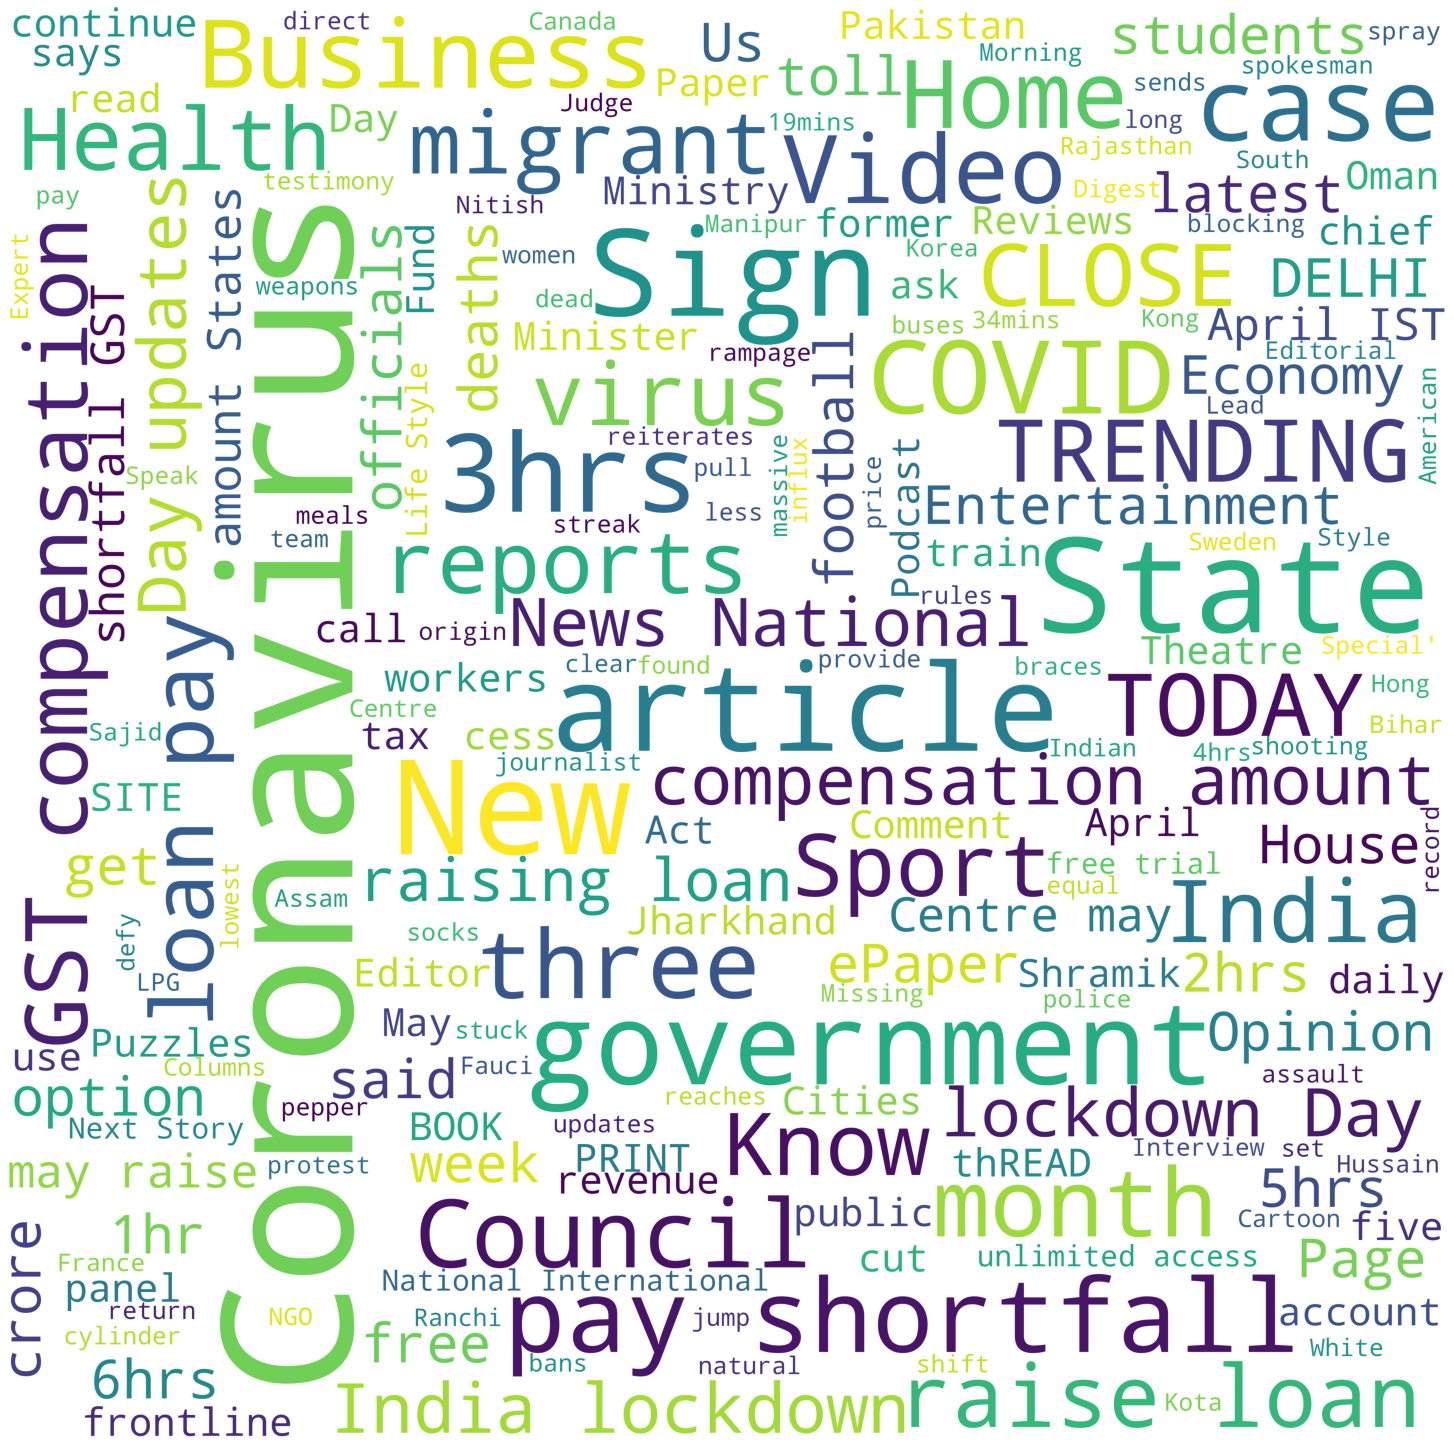

In [0]:
wordcloud = WordCloud(width=8000, height=8000,background_color='white',min_font_size=10,stopwords=stop_words).generate(url_to_string(link1))
plt.figure(figsize=(20, 28), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [0]:
@app.route('/wcloud')
def wc(wc_article):
    wordcloud = WordCloud(width=8000, height=8000, background_color='white', min_font_size=10,stopwords=stop_words).generate(wc_article)
    plt.figure(figsize=(20, 28), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('wordcloud.png', dpi='figure')
    plt.show()

In [0]:
@app.route('/', methods=['GET', 'POST'])
@app.route('/index', methods=['GET', 'POST'])
def index():
    if request.method == 'GET':
        return render_template('index.html')
    elif request.method == 'POST':
        url = request.form.get('News article URL')
        print(url)
        string_content_url = url_to_string(str(url))
        nlp_content = string_to_nlp(string_content_url)
        print('nlp content: ', nlp_content)
        # PartsofSpeech(nlp_content)
        ner_object = NER(ner_article=nlp_content)
        # print(ner_object)
        with open('templates/test.html', 'w') as f:
            f.writelines(ner_object)
        return render_template('test.html')


In [28]:
if __name__ == '__main__':
    print("Use the following links if don't have any :\n", link1, '\n', link2, '\n', link3)
    app.run()


Use the following links if don't have any :
 https://www.thehindu.com/news/national/centre-may-raise-loan-to-pay-shortfall-of-gst-compensation-amount/article31329841.ece?homepage=true 
 https://www.thehindu.com/news/national/several-union-ministers-officials-return-to-work-at-ministries/article31329079.ece?homepage=true 
 https://www.thehindu.com/news/national/plea-to-bring-back-to-punjab-stranded-sikh-pilgrims/article31329103.ece?homepage=true
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b5fc2fe1.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[2020-05-04 17:51:42,501] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.6/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-27-1bc9f51a7b48>", line 5, in index
    return render_template('index.html')
  File "/usr/l

In [29]:
from __future__ import unicode_literals, print_function

import plac
import random
from spacy.util import minibatch, compounding


# new entity label
LABEL = "ANIMAL"

TRAIN_DATA = [
    (
        "Chennai is one of the amazing cities in the south of India",
        {"entities": [(0, 7, LABEL)]},
    ),
    ("Mumbaikars are mumbai?", {"entities": []}),
    (
        "Kolkata people are too tall and they pretend to care about your feelings",
        {"entities": [(0, 8, LABEL)]},
    ),
    ("calcutta pretend to care about your feelings", {"entities": [(0, 8, LABEL)]}),
    (
        "they pretend to care about your feelings, those chennai",
        {"entities": [(48, 55, LABEL)]},
    ),
    ("mumbai?", {"entities": [(0, 6, LABEL)]}),
]


@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    new_model_name=("New model name for model meta.", "option", "nm", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_iter=("Number of training iterations", "option", "n", int),
)
def main(model=en_core_web_sm, new_model_name="cities", output_dir=None, n_iter=30):
    """Set up the pipeline and entity recognizer, and train the new entity."""
    random.seed(0)
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    # Add entity recognizer to model if it's not in the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner)
    # otherwise, get it, so we can add labels to it
    else:
        ner = nlp.get_pipe("ner")

    ner.add_label(LABEL)  # add new entity label to entity recognizer
    # Adding extraneous labels shouldn't mess anything up
    ner.add_label("VEGETABLE")
    if model is None:
        optimizer = nlp.begin_training()
    else:
        optimizer = nlp.resume_training()
    move_names = list(ner.move_names)
    # get names of other pipes to disable them during training
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            batches = minibatch(TRAIN_DATA, size=sizes)
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
            print("Losses", losses)

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.meta["name"] = new_model_name  # rename model
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        # Check the classes have loaded back consistently
        assert nlp2.get_pipe("ner").move_names == move_names
        doc2 = nlp2(test_text)
        for ent in doc2.ents:
            print(ent.label_, ent.text)


if __name__ == "__main__":
    plac.call(main)

usage: ipykernel_launcher.py [-h]
                             [-m <module 'en_core_web_sm' from '/usr/local/lib/python3.6/dist-packages/en_core_web_sm/__init__.py'>]
                             [-nm cities] [-o None] [-n 30]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-aaff0287-4c0b-4f82-9cd7-15b8b625c3e4.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
